In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib qt

Gradient decay
==========================================

Some results worth saving and displaying for visualization and understanding

1/ Decay of gradient variances with increasing qubit count
---------------------------

First importing the relevant packages

In [2]:
import sys
sys.path.append('../src')
sys.path.append('src')
import matplotlib.pyplot as plt
import numpy as np
from gadget_plots import *
from data_management import get_training_costs, get_training_labels2, get_training_info

data_folder = '../../results/data/'

colours = np.array([plt.cm.Purples(np.linspace(0, 1, 10)),          # global
                    plt.cm.Blues(np.linspace(0, 1, 10)),            # local
                    plt.cm.Oranges(np.linspace(0, 1, 10)),          # gadget2
                    plt.cm.Reds(np.linspace(0, 1, 10)),             # gadget3
                    plt.cm.Greys(np.linspace(0, 1, 10))])[:, 3:]    # legends

Exponential decay of the global Hamiltonian
$$H_G = \bigotimes_{i=1}^n \sigma_i^z $$

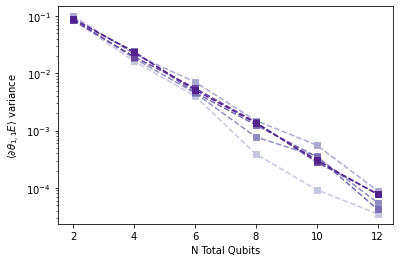

In [3]:
file_list = [data_folder + 'gradients/220707/gradients_nr0001.npz',
             data_folder + 'gradients/220707/gradients_nr0002.npz']
data = np.load(file_list[0])
variances_list = data['variances_list']
norms_list = data['norms_list']
qubits_list = data['width_list']

fig, ax = plt.subplots()
for line in range(len(variances_list)):
    normalized_variances = variances_list[line]/norms_list[line]**2
    ax.semilogy(qubits_list, normalized_variances, "--s", c=colours[0][line])
ax.set_xlabel(r"N Total Qubits")
ax.set_ylabel(r"$\langle \partial \theta_{1, 1} E\rangle$ variance")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

Training
=======

3-local gadget decomposition
---------------------